In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('bmh')
import seaborn as sns
import missingno as msno

# for pre-processing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# for machine learning modelling
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix


In [3]:
# training dataset
train_df = pd.read_csv('../../data/raw/home/application_train.csv', index_col='SK_ID_CURR')
train_df


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0


In [4]:
# testing dataset
test_df = pd.read_csv('../../data/raw/home/application_test.csv', index_col='SK_ID_CURR')
test_df

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,Unaccompanied,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0


In [5]:
# datasets sizes
print(f'Training dataset contains {train_df.shape[0]} records and {train_df.shape[1]} columns.')
print(f'Testing dataset contains {test_df.shape[0]} records and {test_df.shape[1]} columns.')

Training dataset contains 307511 records and 121 columns.
Testing dataset contains 48744 records and 120 columns.


In [6]:
# check missing values all NaNs
print(f'Total training NaNs = {train_df.isnull().sum().sum()}')
print(f'Total Testing NaNs = {test_df.isnull().sum().sum()}')

Total training NaNs = 9152465
Total Testing NaNs = 1404419


In [7]:
# Only columns with NaNs count and percentage
columns = train_df.isnull().sum()[train_df.isnull().sum() != 0].keys()
nans_count = train_df.isnull().sum()[train_df.isnull().sum() != 0].values
nans_percentage = train_df.isnull().sum()[train_df.isnull().sum() != 0].values/train_df.shape[0]

# create a dataframe from the extracted info.
nans_df = pd.DataFrame({'Column':columns, 'No. of NaNs':nans_count, '% of NaNs in Column':nans_percentage*100})
nans_df = nans_df.sort_values(by='% of NaNs in Column', ascending=False)
nans_df

,Column,No. of NaNs,% of NaNs in Column
41,COMMONAREA_MEDI,214865,69.872297
13,COMMONAREA_AVG,214865,69.872297
27,COMMONAREA_MODE,214865,69.872297
49,NONLIVINGAPARTMENTS_MEDI,213514,69.432963
35,NONLIVINGAPARTMENTS_MODE,213514,69.432963
...,...,...,...
7,EXT_SOURCE_2,660,0.214626
1,AMT_GOODS_PRICE,278,0.090403
0,AMT_ANNUITY,12,0.003902
5,CNT_FAM_MEMBERS,2,0.000650


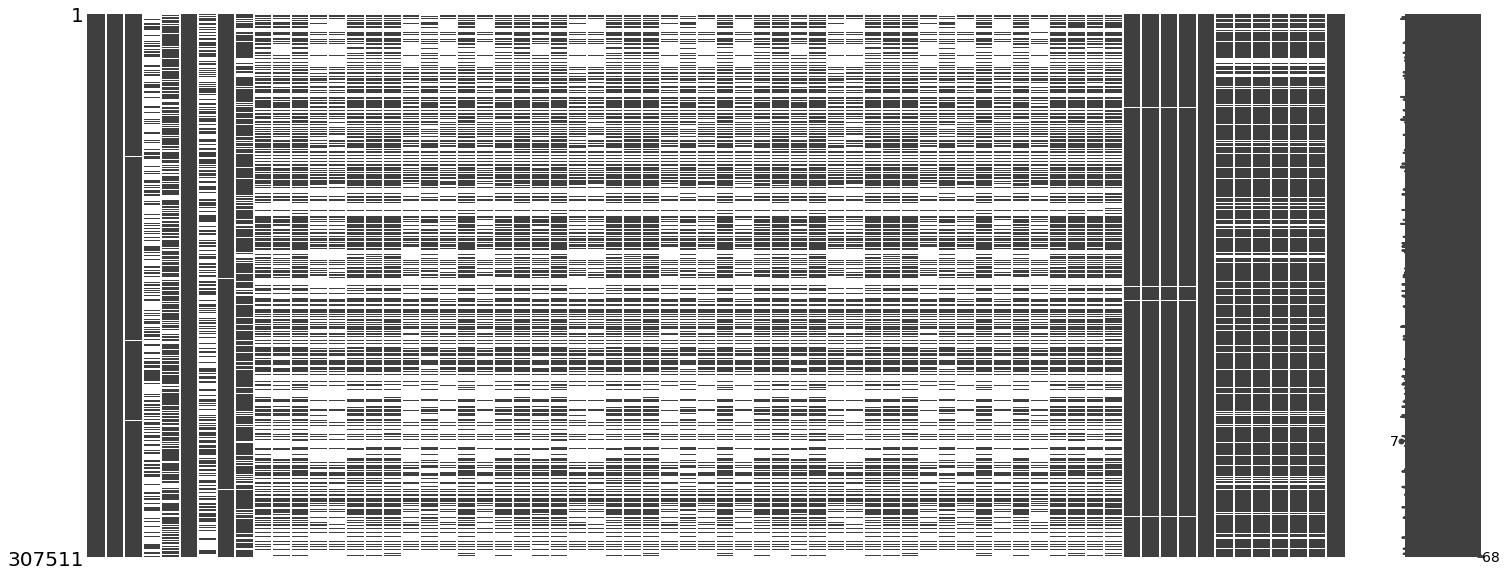

In [8]:
# visualize columns with NaNs distribution over target
msno.matrix(train_df[list(columns)+['TARGET']].sort_values(by='TARGET'))

In [9]:
# check duplicates
# sum of all duplicated records in data
train_df.duplicated().sum()

0

In [10]:
# target value counts per each class
print('Count of Each Class\n' + '-'*20)
print(train_df['TARGET'].value_counts())

Count of Each Class
--------------------
0    282686
1     24825
Name: TARGET, dtype: int64


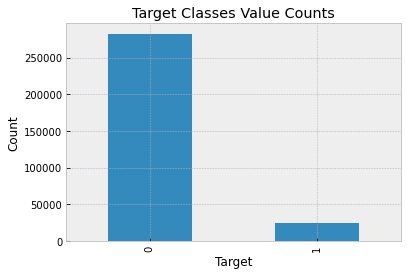

In [11]:
# visualize TARGET value counts
train_df['TARGET'].value_counts().plot(kind='bar');
plt.title('Target Classes Value Counts')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [12]:
# all columns dtypes
train_df.dtypes.value_counts()

float64    65
int64      40
object     16
dtype: int64

In [13]:
# go deeper with object columns and extract the unique classes in each column
## create a dataframe with object dtype columns
unique_df = pd.DataFrame(train_df.select_dtypes('object').nunique()).reset_index()
unique_df.columns = ['Column','No. of Unique Values']

## extract the unique classes in each column
unique_df['Unique Values'] = unique_df['Column'].apply(lambda x: train_df[x].unique())
unique_df.sort_values(by='No. of Unique Values')

,Column,No. of Unique Values,Unique Values
0,NAME_CONTRACT_TYPE,2,"[Cash loans, Revolving loans]"
2,FLAG_OWN_CAR,2,"[N, Y]"
3,FLAG_OWN_REALTY,2,"[Y, N]"
15,EMERGENCYSTATE_MODE,2,"[No, nan, Yes]"
1,CODE_GENDER,3,"[M, F, XNA]"
13,HOUSETYPE_MODE,3,"[block of flats, nan, terraced house, specific..."
12,FONDKAPREMONT_MODE,4,"[reg oper account, nan, org spec account, reg ..."
6,NAME_EDUCATION_TYPE,5,"[Secondary / secondary special, Higher educati..."
7,NAME_FAMILY_STATUS,6,"[Single / not married, Married, Civil marriage..."
8,NAME_HOUSING_TYPE,6,"[House / apartment, Rented apartment, With par..."


In [14]:
# check CODE_GENDER column in training and testing datasets
print('Train Dataset')
print(train_df['CODE_GENDER'].value_counts())

print('\nTest Dataset')
print(test_df['CODE_GENDER'].value_counts())

Train Dataset
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Test Dataset
F    32678
M    16066
Name: CODE_GENDER, dtype: int64


In [15]:
# Top 5 Columns with Positive Correlation with our TARGET
print('Top 5 Columns with Positive Correlation with TARGET\n', '-'*50)
print(train_df.corr()['TARGET'].sort_values().tail(5))

# Negative ones
print('\nTop 5 Columns with Negative Correlation with TARGET\n', '-'*50)
print(train_df.corr()['TARGET'].sort_values().head(5))

Top 5 Columns with Positive Correlation with TARGET
 --------------------------------------------------
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Top 5 Columns with Negative Correlation with TARGET
 --------------------------------------------------
EXT_SOURCE_3    -0.178919
EXT_SOURCE_2    -0.160472
EXT_SOURCE_1    -0.155317
DAYS_EMPLOYED   -0.044932
FLOORSMAX_AVG   -0.044003
Name: TARGET, dtype: float64


### Let's skip the data analysis part and go to the data cleaning and preproc!!!!!

In [16]:
# before start cleaning, we keep copy of datasets
train_copy = train_df.copy()
test_copy = test_df.copy()

## Drop rows with Nans > 40%

In [17]:
# extract these columns from nans_df
drop_cols = nans_df[nans_df['% of NaNs in Column']>40]['Column'].tolist()
keep_cols = [col for col in train_df.columns if col not in drop_cols]

# extract the new train dataframe
train_df = train_df[keep_cols]

# remove Target from keep_cols and create the new test dataframe
keep_cols.remove('TARGET')
test_df = test_df[keep_cols]

In [18]:
# check the new datasets shapes
print(train_df.shape)
print(test_df.shape)

(307511, 72)
(48744, 71)


#### Drop XNA records from CODE_GENDER column

In [19]:
# extract all records doesn't have XNA value in CODE_GENDER column
train_df = train_df[train_df['CODE_GENDER']!='XNA']

# check
train_df['CODE_GENDER'].value_counts()

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

## Drop the wrong value in AMT_INCOME_TOTAL column

In [20]:
train_df = train_df[train_df['AMT_INCOME_TOTAL'] != 117000000.0]

In [21]:
# DAYS_EMPLOYED column
train_df['DAYS_EMPLOYED'] = train_df['DAYS_EMPLOYED'].apply(lambda x: np.nan if x==365243 else x)
test_df['DAYS_EMPLOYED'] = test_df['DAYS_EMPLOYED'].apply(lambda x: np.nan if x==365243 else x)

D:\Software\anaconda3\envs\newtf115\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
# check
print(train_df['DAYS_EMPLOYED'].max())
print(test_df['DAYS_EMPLOYED'].max())

0.0
-1.0


In [23]:
# DAYS_LAST_PHONE_CHANGE column
train_df['DAYS_LAST_PHONE_CHANGE'] = train_df['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: np.nan if x==0.0 else x)
test_df['DAYS_LAST_PHONE_CHANGE'] = test_df['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: np.nan if x==0.0 else x)

D:\Software\anaconda3\envs\newtf115\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
# check
print(train_df['DAYS_LAST_PHONE_CHANGE'].max())
print(test_df['DAYS_LAST_PHONE_CHANGE'].max())

-1.0
-1.0


In [25]:
# create a pipeline to deal with numerical features
## 1- impute with median as most of features cotain outliers
## 2- apply Min-Max Scaler get rid of the outliers
numeric_transformer = Pipeline(
    steps=[("num_imputer", SimpleImputer(strategy="median")), ("scaler", MinMaxScaler())]
)

In [26]:
# create a pipeline to deal with catagorical features
## 1- impute with the most frequent class "mode"
## 2- apply One-Hot Encoding
categorical_transformer = Pipeline(
    steps=[("cat_imputer", SimpleImputer(strategy="most_frequent")), ("encoder", OneHotEncoder(handle_unknown='ignore', drop='first'))]
)

In [27]:
# create a column transformer instant
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, make_column_selector(dtype_exclude="object")),
        ("cat", categorical_transformer, make_column_selector(dtype_include="object")),
    ]
)

In [28]:
# separate target out of features "predictors"
X = train_df.drop('TARGET', axis=1)
y = train_df['TARGET']

In [29]:
# data splitting
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, stratify=y, random_state=42)

In [30]:

X_train.to_csv('home_x_train.csv')
X_val.to_csv('home_x_val.csv')


In [31]:
train_df.to_csv('home.csv')

In [32]:
# create a function for trained models evaluation
def evaluate_model(model_pipeline):
    # prediction
    train_pred = model_pipeline.predict(X_train)
    test_pred = model_pipeline.predict(X_val)

    train_pred_proba = model_pipeline.predict_proba(X_train)
    test_pred_proba = model_pipeline.predict_proba(X_val)

    # evaluations
    print('Training & Validation ROC AUC Scores:\n', '-'*40)
    print('Training   roc auc score= {:.4f}'.format(roc_auc_score(y_train, train_pred_proba[:, 1])))
    print('Validation roc auc score= {:.4f}'.format(roc_auc_score(y_val, test_pred_proba[:, 1])))
    print('')
    print('Training & Validation Confusion Metrices:')
    print('Training   confusion matrix:\n', confusion_matrix(y_train, train_pred))
    print('Validation confusion matrix:\n', confusion_matrix(y_val, test_pred))

In [ ]:
## create model instant and pipeline
rf = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=42)
rf_pipe1 = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", rf)])

# train model
rf_pipe1.fit(X_train, y_train)

# evaluate model
evaluate_model(rf_pipe1)

In [ ]:
# create model instant and pipeline
adaboost = AdaBoostClassifier(n_estimators=200, random_state=42)
ada_pipe1 = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", adaboost)])

# train model
ada_pipe1.fit(X_train, y_train)

# evaluate model
evaluate_model(ada_pipe1)